## Importing Dataset and Modules

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, sys
from collections import defaultdict
from urllib.request import urlopen
import json
import geopandas as gpd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from ipywidgets import widgets
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud , ImageColorGenerator
from PIL import Image
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from google.colab.patches import cv2_imshow
import plotly.io as pio
pio.renderers.default = 'colab'

### Previewing the dataset in a pandas dataframe.


In [ ]:
vote = pd.read_csv('LS_2.0.csv',encoding='cp1252')
vote

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,646875,33.383823,56.464615,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Anil Jayram Rathod,0,IND,MALE,0,43.0,GENERAL,Post Graduate,"Rs 48,90,000\n ~ 48 Lacs+","Rs 10,20,000\n ~ 10 Lacs+",14661,14686,0.766419,1.250060,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,MALE,18,63.0,GENERAL,Graduate,"Rs 1,28,78,51,556\n ~ 128 Crore+","Rs 1,15,35,000\n ~ 1 Crore+",434066,434244,28.975369,41.574183,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,MALE,0,49.0,GENERAL,Post Graduate,"Rs 90,36,63,001\n ~ 90 Crore+",Rs 0\n ~,427900,428015,28.559732,40.977823,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,MALE,3,47.0,GENERAL,12th Pass,"Rs 5,85,77,327\n ~ 5 Crore+","Rs 52,50,000\n ~ 52 Lacs+",138731,138947,9.271379,13.302678,1498666


In [ ]:
vote.shape

(2263, 17)

In [ ]:
vote.head()


,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,646875,33.383823,56.464615,1937690


Our dataset has 2264  rows and 14 columns

## Analysing the data

The dataset has the following columns.

In [ ]:
vote.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'GENERAL\nVOTES', 'TOTAL\nVOTES',
       'OVER TOTAL ELECTORS \nIN CONSTITUENCY',
       'OVER TOTAL VOTES POLLED \nIN CONSTITUENCY', 'TOTAL ELECTORS'],
      dtype='object')

In [ ]:
vote.isnull().sum(axis = 0)

STATE                                          0
CONSTITUENCY                                   0
NAME                                           0
WINNER                                         0
PARTY                                          0
GENDER                                       245
CRIMINAL\nCASES                              245
AGE                                          245
CATEGORY                                     245
EDUCATION                                    245
ASSETS                                       245
LIABILITIES                                  245
GENERAL\nVOTES                                 0
TOTAL\nVOTES                                   0
OVER TOTAL ELECTORS \nIN CONSTITUENCY          0
OVER TOTAL VOTES POLLED \nIN CONSTITUENCY      0
TOTAL ELECTORS                                 0
dtype: int64

 Identifying the Null values

In [ ]:
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
vote['ASSETS'] = vote['ASSETS'].apply((value_cleaner))
vote['LIABILITIES'] = vote['LIABILITIES'].apply((value_cleaner))
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,0,0,13030,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,646875,33.383823,56.464615,1937690


Renaming the columns


In [ ]:
vote.rename(columns={"CRIMINAL\nCASES": "CRIMINAL CASES", "GENERAL\nVOTES": "GENERAL VOTES", "POSTAL\nVOTES": "POSTAL VOTES","TOTAL\nVOTES": "TOTAL VOTES","OVER TOTAL ELECTORS \nIN CONSTITUENCY": "OVER TOTAL ELECTORS IN CONSTITUENCY","OVER TOTAL VOTES POLLED \nIN CONSTITUENCY": "OVER TOTAL VOTES POLLED IN CONSTITUENCY"}, inplace=True)
vote.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,0,0,13030,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,646875,33.383823,56.464615,1937690


Cleaning up the Educational Qualification of the election contestants

In [ ]:
vote.EDUCATION.unique()


array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available',
       'Post Graduate\n'], dtype=object)

In [ ]:
vote.EDUCATION.replace({'Post Graduate\n':'Post Graduate'},inplace=True)
vote.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', nan, 'Doctorate', 'Graduate',
       'Others', '10th Pass', '8th Pass', 'Graduate Professional',
       'Literate', 'Illiterate', '5th Pass', 'Not Available'],
      dtype=object)

Identifying the Data Type of the columns

In [ ]:
vote.dtypes


STATE                                       object
CONSTITUENCY                                object
NAME                                        object
WINNER                                       int64
PARTY                                       object
GENDER                                      object
CRIMINAL CASES                              object
AGE                                        float64
CATEGORY                                    object
EDUCATION                                   object
ASSETS                                      object
LIABILITIES                                 object
GENERAL VOTES                                int64
TOTAL VOTES                                  int64
OVER TOTAL ELECTORS IN CONSTITUENCY        float64
OVER TOTAL VOTES POLLED IN CONSTITUENCY    float64
TOTAL ELECTORS                               int64
dtype: object

Identifying Discrepancy entries in the columns

In [ ]:
vote[vote['CRIMINAL CASES']=='Not Available'].head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
468,Bihar,BUXAR,Ramchandra Singh Yadav,0,IND,MALE,Not Available,42.0,GENERAL,Not Available,0,0,10721,10730,0.586540,1.087175,1829373
532,Tamil Nadu,CHIDAMBARAM,SIVAJOTHI M,0,NTK,MALE,Not Available,35.0,SC,Not Available,0,0,37329,37471,2.531445,3.246331,1480222
612,Uttar Pradesh,DEORIA,BINOD KUMAR JAISWAL,0,BSP,MALE,Not Available,56.0,GENERAL,Not Available,0,0,327728,330713,18.852693,32.563441,1754195
613,Uttar Pradesh,DEORIA,NIYAZ AHMED,0,INC,MALE,Not Available,57.0,GENERAL,Not Available,0,0,50749,51056,2.910509,5.027196,1754195
654,Tamil Nadu,DINDIGUL,"JOTHIMUTHU, K.",0,PMK,MALE,Not Available,48.0,GENERAL,Not Available,0,0,206782,207551,13.460896,17.877979,1541881


Updating the data types for the analysis

In [ ]:
vote['ASSETS']=pd.to_numeric(vote['ASSETS'])
vote['LIABILITIES']=pd.to_numeric(vote['LIABILITIES'])
vote['CRIMINAL CASES'].replace({np.NaN:0})
vote['CRIMINAL CASES'] = pd.to_numeric(vote['CRIMINAL CASES'], errors='coerce').fillna(0).astype(np.int64)

## Data Insights and Analysis

Constituencies per state 


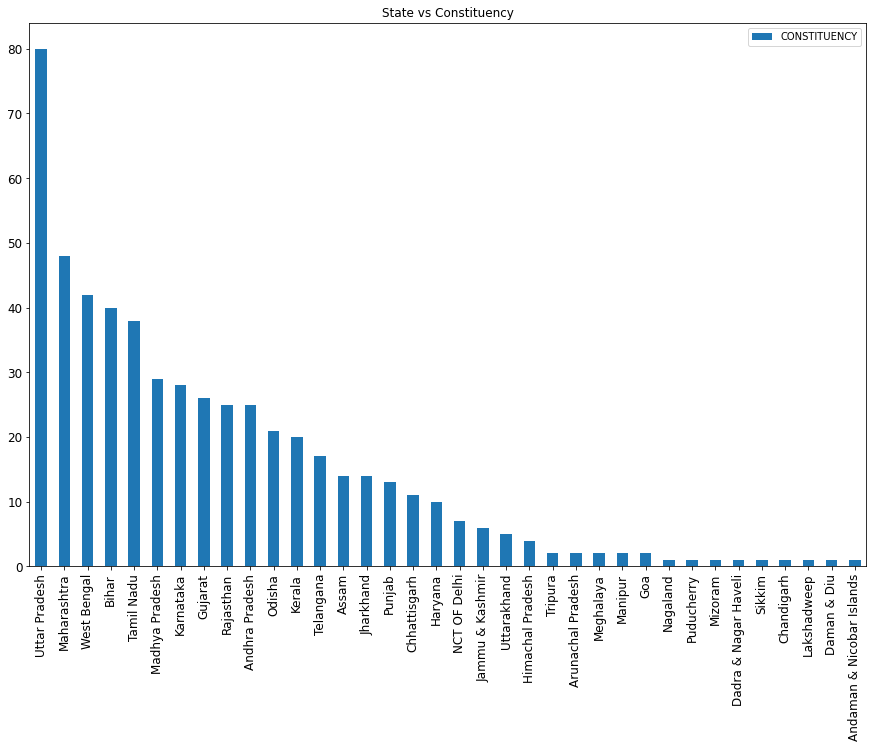

In [ ]:
constituencies_per_state = vote.groupby('STATE')['CONSTITUENCY'].nunique().reset_index().sort_values('CONSTITUENCY',ascending = False)
constituencies_per_state
ax = constituencies_per_state[['STATE','CONSTITUENCY']].plot(kind='bar', title ="State vs Constituency", figsize=(15, 10), legend=True, fontsize=12).set_xticklabels(constituencies_per_state['STATE'])

In [ ]:
vote_prty=vote[vote['PARTY']!='NOTA']
prty_cnt=vote_prty.groupby('PARTY').apply(lambda x:x['CONSTITUENCY'].count()).reset_index(name='# Constituency')
prty_st=vote_prty.groupby('PARTY').apply(lambda x:x['STATE'].nunique()).reset_index(name='# State')
prty_cnt.sort_values(by='# Constituency',ascending=False,inplace=True)
prty_top_cn=prty_cnt[:25]
prty_top_all=pd.merge(prty_top_cn,prty_st,how='inner',left_on='PARTY',right_on='PARTY')

Parties winning maximum constituencies 

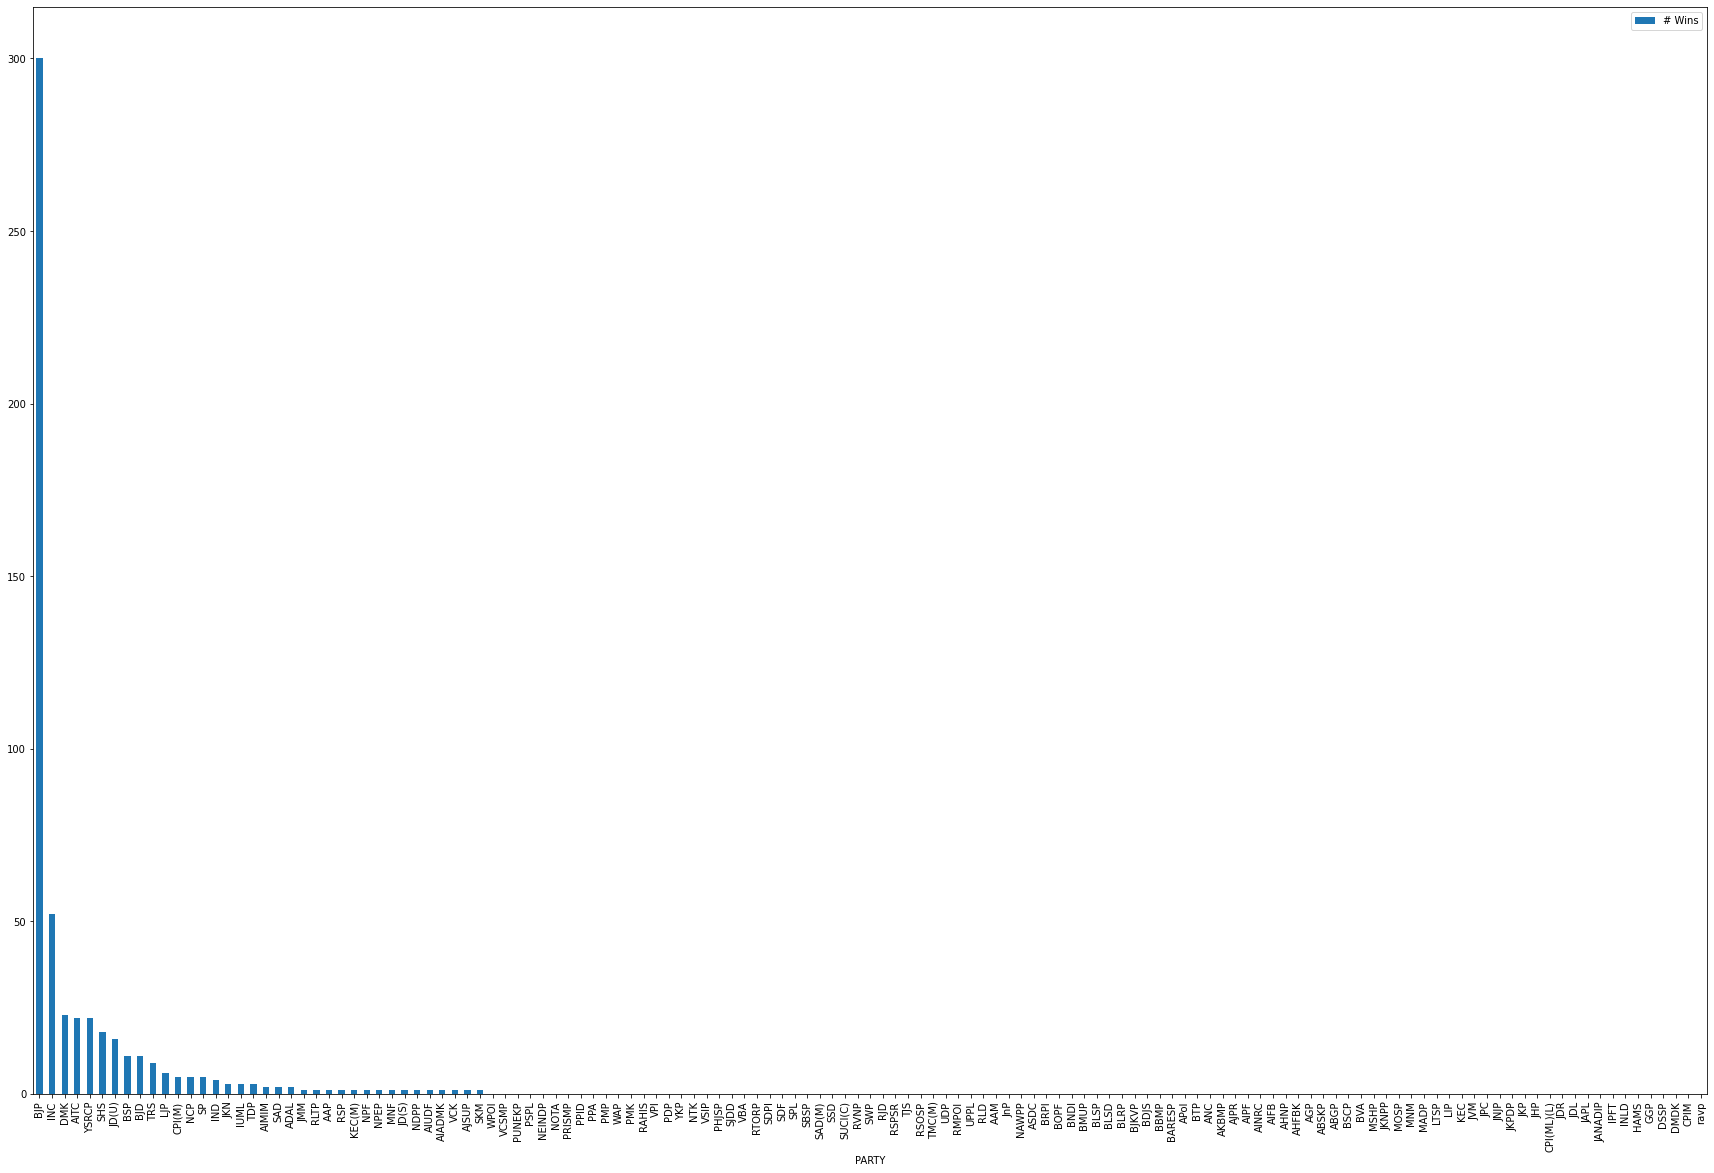

In [ ]:
part_win=vote.groupby('PARTY').apply(lambda x:x['WINNER'].sum()).reset_index(name='# Wins')
part_win.sort_values(by='# Wins',ascending=False,inplace=True)
part_win.plot(x="PARTY", y="# Wins", kind="bar",figsize=(30, 20))


In [ ]:
part_win=vote.groupby('PARTY').apply(lambda x:x['WINNER'].sum()).reset_index(name='# Wins')
part_win.sort_values(by='# Wins',ascending=False,inplace=True)
top_part_win=part_win[0:15]
fig = px.bar(top_part_win, x='PARTY', y='# Wins',
                     color='# Wins',title='Win Counts by a Political Party in 2019')
fig.update_layout(title_text='Win Counts by a Political Party in 2019',template='plotly_dark')
fig.show()

Gender ratio of Winners

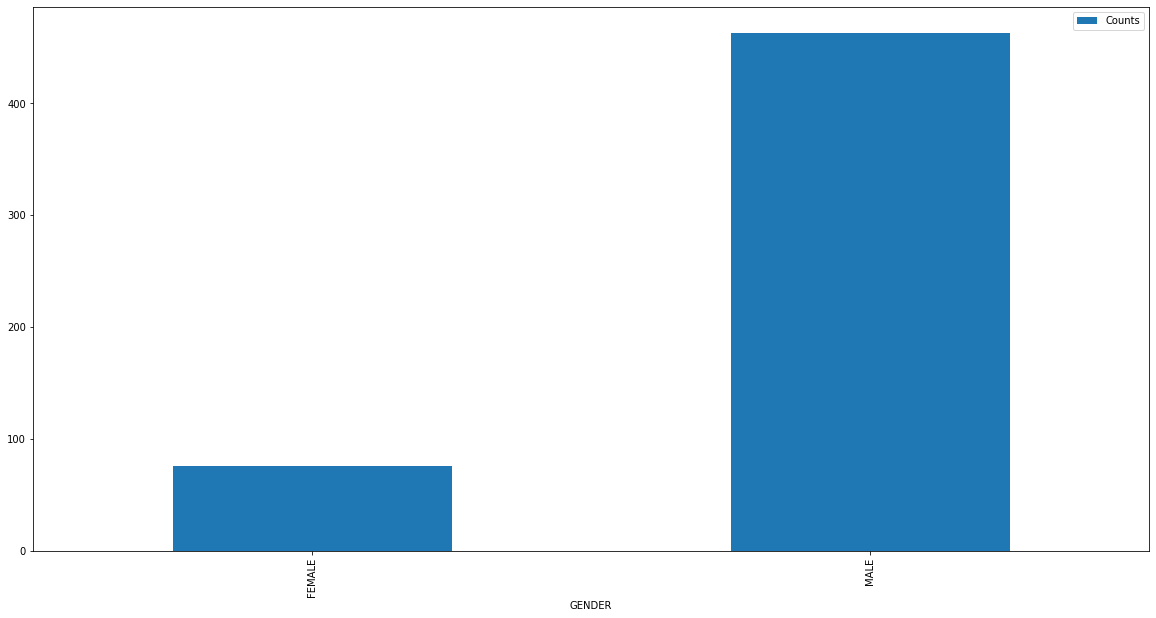

In [ ]:
vote_gndr=vote[vote['PARTY']!='NOTA']
gndr_overall=vote_gndr.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
winners=vote_gndr[vote_gndr['WINNER']==1]
gndr_winner=winners.groupby('GENDER').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
gndr_winner['Category']='Winning Gender Ratio'
gndr_winner.plot( x='GENDER', y='Counts',kind="bar",figsize=(20,10))


Education Qualifications of Winners


In [ ]:
ed_valid=vote[vote['PARTY']!="NOTA"]
ed_cnt=ed_valid.groupby('EDUCATION').apply(lambda x:x['PARTY'].count()).reset_index(name='Counts')
ed_won=ed_valid[ed_valid['WINNER']==1]
ed_win_cnt=ed_won.groupby('EDUCATION').apply(lambda x:x['PARTY'].count()).reset_index(name='Counts')
fig2 = go.Figure(data=[go.Pie(labels=ed_win_cnt['EDUCATION'], values=ed_win_cnt['Counts'], pull=[0.1, 0.2, 0, 0.1, 0.2, 0,0.1, 0.1, 0.2,0, 0.1, 0.2],title='Education Qualification of the Winners')])
fig2.update_layout(title_text='Education Qualification of the Winners',template='plotly_dark')
fig2.show()

Criminal Cases of Politicians

In [ ]:
crim_cnt=ed_valid.groupby('CRIMINAL CASES').apply(lambda x:x['NAME'].count()).reset_index(name='Counts')
fig = px.histogram(crim_cnt, x='CRIMINAL CASES',y='Counts',marginal='violin')
fig.update_layout(title_text='Criminal Cases Counts Distribution among the politicians',template='plotly_dark')
fig.show()